1. Familiarise yourself with your data, ideally with some descriptive plots and statistics. 



2. Develop a simple model predicting units from prices (e.g. using elasticities) for all products, 
so a model describing the distribution (or a point estimate) of units | price, product attributes. 
Fit the model to the data and provide some estimate of the risk of your model against a baseline. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings("ignore")

In [2]:
product=pd.read_csv("data/product.csv")
sales=pd.read_csv("data/sales.csv")

In [3]:
product.head()

,Unnamed: 0,brand,flavour,volume_per_joghurt_g,packsize,product_id
0,0,Mueller,blueberry,150,6,0
1,1,Oikos,chocolate,1000,1,1
2,2,Alnatura,strawberry,1000,1,2
3,3,Mueller,straciatella,500,6,3
4,4,Danone,straciatella,150,6,4


In [4]:
sales.head()

,Unnamed: 0,date,product_id,price,units
0,0,2020-01-01,0,4.65,1126.0
1,1,2020-01-02,0,4.76,1205.0
2,2,2020-01-03,0,5.22,1007.0
3,3,2020-01-04,0,5.45,1282.0
4,4,2020-01-05,0,3.33,1037.0


In [5]:
product["brand"].value_counts()

Danone               5
Mueller              4
Oikos                4
Rewe                 4
Alnatura             3
Activia              2
Ja!                  2
Ecke-Mit-Was-Drin    2
Actimel              1
Name: brand, dtype: int64

In [6]:
product=product.sort_values('brand')


In [7]:
product[["brand","product_id"]]

,brand,product_id
19,Actimel,19
23,Activia,23
9,Activia,9
2,Alnatura,2
6,Alnatura,6
8,Alnatura,8
13,Danone,13
4,Danone,4
5,Danone,5
21,Danone,21


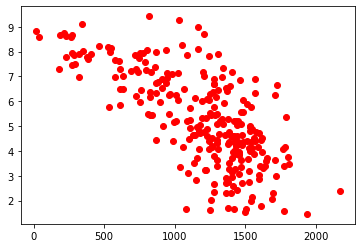

In [8]:
plt.plot(sales["units"],sales["price"], 'ro')

Text(0.5, 1.0, 'Price - Units Graphs for Brand Mueller')

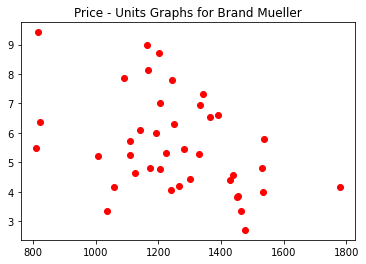

In [9]:
#mueller
x=[0,3,10,17]
plt.plot(sales.units[sales.product_id.isin(x)],sales.price[sales.product_id.isin(x)], 'ro')
plt.title("Price - Units Graphs for Brand Mueller")

Text(0.5, 1.0, 'Price - Units Graphs for Brand Rewe')

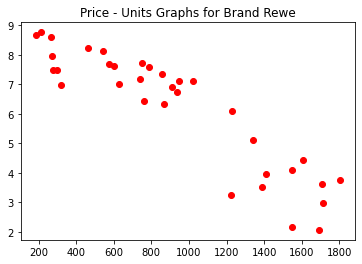

In [10]:
#rewe
x=[7,14,20,24]
plt.plot(sales.units[sales.product_id.isin(x)],sales.price[sales.product_id.isin(x)], 'ro')
plt.title("Price - Units Graphs for Brand Rewe")

Text(0.5, 1.0, 'Price - Units Graphs for Brand Oikos')

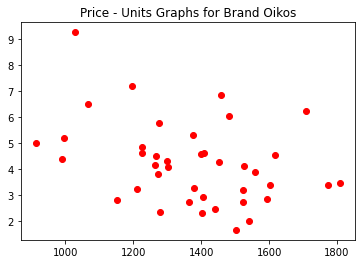

In [11]:
#oikos
x=[1,15,18,26]
plt.plot(sales.units[sales.product_id.isin(x)],sales.price[sales.product_id.isin(x)], 'ro')
plt.title("Price - Units Graphs for Brand Oikos")

Text(0.5, 1.0, 'Price - Units Graphs for Brand Alnatura')

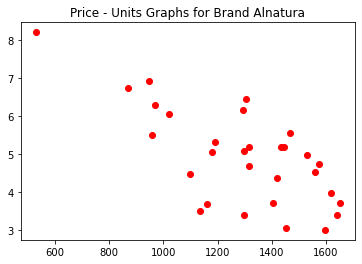

In [12]:
#alnatura
x=[2,6,8]
plt.plot(sales.units[sales.product_id.isin(x)],sales.price[sales.product_id.isin(x)], 'ro')
plt.title("Price - Units Graphs for Brand Alnatura")

Text(0.5, 1.0, 'Price - Units Graphs for Brand Danone')

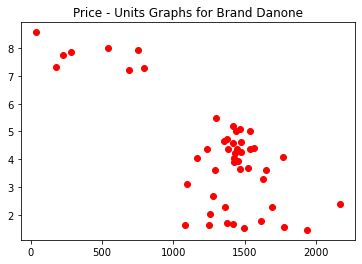

In [13]:
#danone
x=[4,5,13,21,25]
plt.plot(sales.units[sales.product_id.isin(x)],sales.price[sales.product_id.isin(x)], 'ro')
plt.title("Price - Units Graphs for Brand Danone")

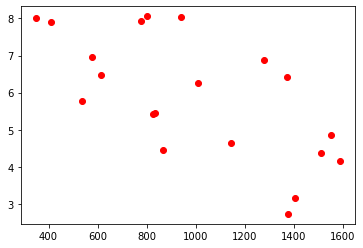

In [14]:
#Activia
x=[9,23]
plt.plot(sales.units[sales.product_id.isin(x)],sales.price[sales.product_id.isin(x)], 'ro')

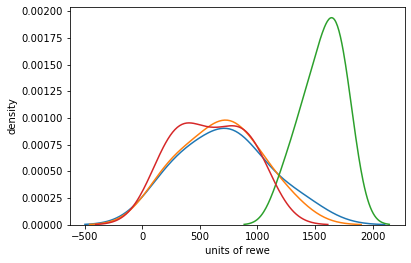

In [15]:
sns.kdeplot(sales.units[sales.product_id == 7]);
sns.kdeplot(sales.units[sales.product_id == 14]);
sns.kdeplot(sales.units[sales.product_id == 20]);
sns.kdeplot(sales.units[sales.product_id == 24]);


# beautifying the labels
plt.xlabel('units of rewe')
plt.ylabel('density')
plt.show()

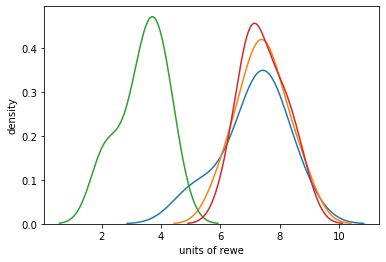

In [16]:
#price dist
sns.kdeplot(sales.price[sales.product_id == 7]);
sns.kdeplot(sales.price[sales.product_id == 14]);
sns.kdeplot(sales.price[sales.product_id == 20]);
sns.kdeplot(sales.price[sales.product_id == 24]);


# beautifying the labels
plt.xlabel('units of rewe')
plt.ylabel('density')
plt.show()

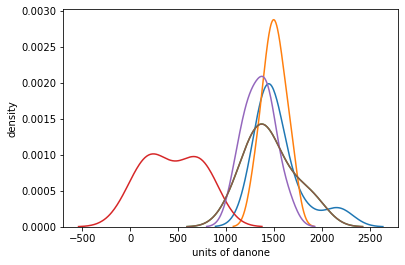

In [17]:
sns.kdeplot(sales.units[sales.product_id == 13]);
sns.kdeplot(sales.units[sales.product_id == 4]);
sns.kdeplot(sales.units[sales.product_id == 5]);
sns.kdeplot(sales.units[sales.product_id == 21]);
sns.kdeplot(sales.units[sales.product_id == 25]);
sns.kdeplot(sales.units[sales.product_id == 5]);

# beautifying the labels
plt.xlabel('units of danone')
plt.ylabel('density')
plt.show()

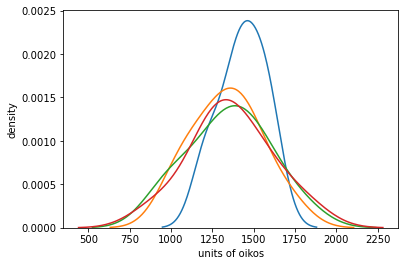

In [18]:
sns.kdeplot(sales.units[sales.product_id == 1]);
sns.kdeplot(sales.units[sales.product_id == 15]);
sns.kdeplot(sales.units[sales.product_id == 18]);
sns.kdeplot(sales.units[sales.product_id == 26]);


# beautifying the labels
plt.xlabel('units of oikos')
plt.ylabel('density')
plt.show()

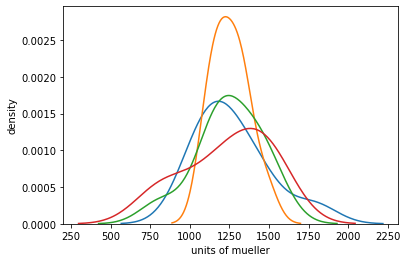

In [19]:
sns.kdeplot(sales.units[sales.product_id == 0]);
sns.kdeplot(sales.units[sales.product_id == 3]);
sns.kdeplot(sales.units[sales.product_id == 10]);
sns.kdeplot(sales.units[sales.product_id == 17]);



# beautifying the labels
plt.xlabel('units of mueller')
plt.ylabel('density')
plt.show()

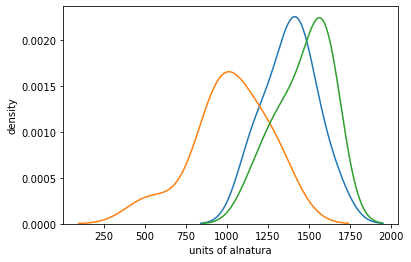

In [20]:
sns.kdeplot(sales.units[sales.product_id == 2]);
sns.kdeplot(sales.units[sales.product_id == 6]);
sns.kdeplot(sales.units[sales.product_id == 8]);



# beautifying the labels
plt.xlabel('units of alnatura')
plt.ylabel('density')
plt.show()

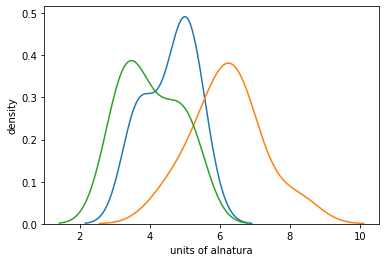

In [21]:
#price density
sns.kdeplot(sales.price[sales.product_id == 2]);
sns.kdeplot(sales.price[sales.product_id == 6]);
sns.kdeplot(sales.price[sales.product_id == 8]);



# beautifying the labels
plt.xlabel('units of alnatura')
plt.ylabel('density')
plt.show()

In [22]:
def normalize_data(df):
    # df on input should contain only one column with the price data (plus dataframe index)
    min = df.min()
    max = df.max()
    x = df 
    
    # time series normalization part
    # y will be a column in a dataframe
    y = (x - min) / (max - min)
    
    return y

In [23]:
#creating new data frames for each product
ids=list(range(27))

d = {}
for i in ids:
    d[i] = pd.DataFrame(sales[sales.product_id==i])

For each product fit a linear model Unit_t = beta * Price_t + beta_0 and use LASSO to do this - think about how you will set the regularisation parameter...

also try a transformation of price to make this look more linear ect.


In [ ]:
for k in range(0,27):
    X=d[k].price
    y=d[k].units

    X = normalize_data(X)

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

    X_train=X_train.values.reshape(-1,1)
    X_test=X_test.values.reshape(-1,1)


    model = LassoCV(cv=3, max_iter=10000)

    # Fit model
    model.fit(X_train, y_train)

    lasso_best = Lasso(alpha=model.alpha_)
    lasso_best.fit(X_train, y_train)
    
   
    
    print("product",k)
    
    print("LASSO Regression Results:")
    print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
    print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

    
    ols_model = ols("units ~ price", data=d[k]).fit()
    print(ols_model.summary())
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(ols_model, fig=fig)
    
    print("-----------------------------------------------------------------------")



product 0
LASSO Regression Results:
R squared training set 34.91
R squared test set -280.11
                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                    0.5514
Date:                Mon, 23 May 2022   Prob (F-statistic):              0.479
Time:                        16:36:21   Log-Likelihood:                -67.804
No. Observations:                  10   AIC:                             139.6
Df Residuals:                       8   BIC:                             140.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

-----------------------------------------------------------------------
product 5
LASSO Regression Results:
R squared training set 15.4
R squared test set -115.95
                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     1.589
Date:                Mon, 23 May 2022   Prob (F-statistic):              0.243
Time:                        16:36:23   Log-Likelihood:                -68.278
No. Observations:                  10   AIC:                             140.6
Df Residuals:                       8   BIC:                             141.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t    

-----------------------------------------------------------------------
product 10
LASSO Regression Results:
R squared training set 50.04
R squared test set -19.36
                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     11.45
Date:                Mon, 23 May 2022   Prob (F-statistic):            0.00959
Time:                        16:36:25   Log-Likelihood:                -62.570
No. Observations:                  10   AIC:                             129.1
Df Residuals:                       8   BIC:                             129.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t   

however this ignores time, the standard linear model assumes the observations are independent and given that we have a time element they might not be. 

have a look at the autocorrelations of the residuals (if you order according to time) from the first model, if they appear to be correlated over time then you need to take this into account. 

If they are autocorrelated this would lead to something like

Unit_t = beta_1 Price_t + beta_2 Unit_t-1 + beta_0 

or 

Unit_t = beta_1 Price_t + beta_2 Price_t-1 + beta_0 

with any model, check that the residuals appear to be independent over time - if they are then you will know you have correctly accounted for the time dependence.

In [ ]:
#model with price t-1
for k in range(0,27):
    train_data=d[k]
    train_data["price"] = normalize_data(train_data["price"])
    train_data=train_data.drop(["product_id","date","Unnamed: 0"],axis=1)
    train_data=pd.concat([train_data.price, train_data.price.shift(),train_data.units], axis=1)
    train_data.columns = ['price_t', 'price_t_1', 'units']
    train_data['price_t_1'].fillna(train_data['price_t'].mean(), inplace=True)
    
    model = ols("units ~ price_t+price_t_1", data=train_data).fit()
    
    print("Product",k)
    print(model.summary())
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(model, fig=fig)
    
    print("-----------------------------------------------------------------------")



In [ ]:
#model with unit t-1
for k in range(0,27):
    train_data=d[k]
    train_data["price"] = normalize_data(train_data["price"])
    train_data=train_data.drop(["product_id","date","Unnamed: 0"],axis=1)
    train_data=pd.concat([train_data.price, train_data.units.shift(),train_data.units], axis=1)
    train_data.columns = ['price_t', 'unit_t_1', 'units']
    train_data['unit_t_1'].fillna(train_data['units'].mean(), inplace=True)
    
    model = ols("units ~ price_t+unit_t_1", data=train_data).fit()
    
    print("Product",k)
    print(model.summary())
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(model, fig=fig)
    
    print("-----------------------------------------------------------------------")



In [ ]:
#model with price t-1
for k in range(0,27):
    train_data=d[k]
    train_data["price"] = normalize_data(train_data["price"])
    train_data=train_data.drop(["product_id","date","Unnamed: 0"],axis=1)
    train_data=pd.concat([train_data.price, train_data.price.shift(),train_data.units], axis=1)
    train_data.columns = ['price_t', 'price_t_1', 'units']
    
    #when I used lag t-1, I have a NaN value of price. I replace that nan with mean of the price column.
    train_data['price_t_1'].fillna(train_data['price_t'].mean(), inplace=True)
    
    print("Product",k)
    
    train_data["price_t"] = normalize_data(train_data["price_t"])
    train_data["price_t_1"] = normalize_data(train_data["price_t_1"])
    
    
    y=train_data.units
    X=train_data.drop(["units"],axis=1)

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


    model = LassoCV(cv=3, max_iter=10000)

    # Fit model
    model.fit(X_train, y_train)

    lasso_best = Lasso(alpha=model.alpha_)
    lasso_best.fit(X_train, y_train)

    print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
    print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))
   
    print("-----------------------------------------------------------------------")



 However they assume all of the products are independent, whereas actually they are all yoghurts so maybe they are not. You could try to improve these individual models by making a global model. i.e. consider all of the products together. You could then have a model 

Unit_t = beta_1 * Brand + beta_2 * Flavour + beta_3 * volume_place_yohurt + beta_4 * packsize + beta_5 * Price_t  + beta_0 

Again you might need to try some transformations of the variables to make the model linear (don't do anything crazy, just have a look to see if the residuals looks linear with each variable) and also consider the time series dependence as mentioned above. 

In [ ]:
df=sales.merge(product,on="product_id")

In [ ]:
df=df.drop(["Unnamed: 0_x","Unnamed: 0_y"],axis=1)

In [ ]:
df

In [ ]:
#creating dummy variables for categorical features
df_dumm = pd.get_dummies(df, columns=["brand","flavour"], drop_first = True)

In [ ]:
df_dumm["price"] = normalize_data(df_dumm["price"])

In [ ]:
y=df_dumm.units
X=df_dumm.drop(["units","date","product_id"],axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [ ]:
model = LassoCV(cv=3, max_iter=10000)

# Fit model
model.fit(X_train, y_train)

lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)

print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

In [ ]:
model = sm.OLS(y,X)
results = model.fit()

results.params
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)